<center><h1>E-Signing of Loan using  Machine Learning</h1></center>

<h4>ESignature:</h4>
<br>
<p style="text-indent:5em">Electronic signatures aren’t exactly a novelty. They have been around since the American Civil War, during which contracts were signed through Morse. In a modern setting, an e-Sign refers to a unique, digitised, encrypted personal identifier. This is, in essence, different from the ‘wet’ signatures created by hand. The e-Sign is meant to complete transactions, loops, and agreements electronically.</p>

<p style="text-indent:5em">In India, the e-Sign has been granted legal status by amendments to various laws, namely the Information Technology Act, Indian Evidence Act and the Negotiable Instruments Act. Early adopters in the financial sector have started using e-Sign to get customers to sign loan and card applications, and loan agreements.</p>





In [ ]:
import tensorflow as tf

tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7986429717833634240, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5906531531928797080
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

### Importing the Library

In [ ]:
#importing library for reading, writing and perform basic operations
import pandas as pd
import numpy as np

#Importing library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing the library for evaluating the model
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

### Reading the Data

In [ ]:
!gdown --id 1JuvbJcJ_j2f5mn6V5iadABpC7u1XEg8R

Downloading...
From: https://drive.google.com/uc?id=1JuvbJcJ_j2f5mn6V5iadABpC7u1XEg8R
To: /content/financial_data.csv
2.33MB [00:00, 74.2MB/s]


In [ ]:
data_df=pd.read_csv("financial_data.csv")


### Exploring the Data

In [ ]:
data_df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [ ]:
data_df.dtypes

entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

><font color="blue"><b>There are 21 features in which one is categorical feature </b></font>

In [ ]:
data_df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [ ]:
data_df.tail()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
17903,9949728,31,monthly,0,3245,0,5,3,2,6,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1
17907,1498559,29,weekly,1,2665,0,4,10,4,1,1,600,64950,0.720889,0.874372,0.505565,0.631619,0.846163,0.846163,4,1


In [ ]:
#Finding the count of each class of dependent variable
print(data_df.e_signed[data_df["e_signed"]==1].count())
print(data_df.e_signed[data_df["e_signed"]==0].count())

9639
8269


In [ ]:
#Checking for percentage of missing data in each column
percent_missing = data_df.isnull().sum() * 100 / len(data_df)                
missing_df = pd.DataFrame({'percent_missing': percent_missing})          

missing_df

,percent_missing
entry_id,0.0
age,0.0
pay_schedule,0.0
home_owner,0.0
income,0.0
months_employed,0.0
years_employed,0.0
current_address_year,0.0
personal_account_m,0.0
personal_account_y,0.0


><font color="blue"><b>We see that the data is not highly imbalanced since the ratio between the count of two classes of dependent variable is not so high and no missing value</b></font>

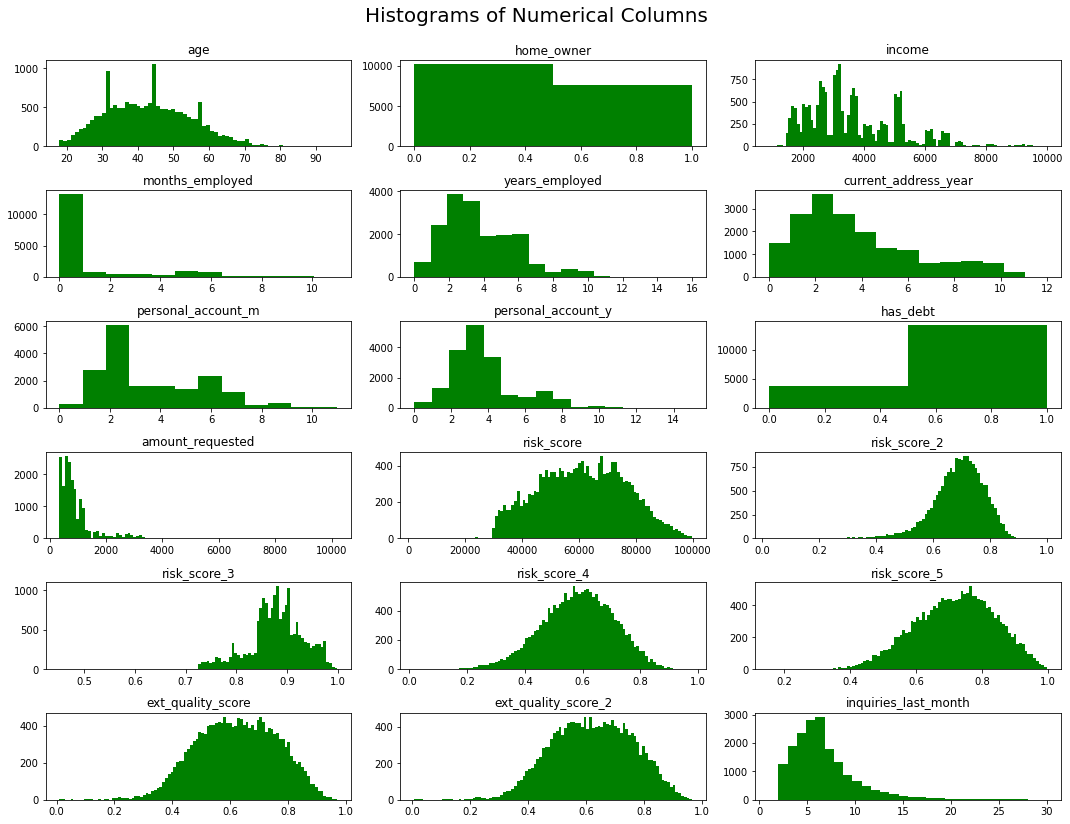

In [ ]:
#Dropping the unnecessary columns
dataset = data_df.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

fig = plt.figure(figsize=(15, 12))

plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset.columns.values[i])

    vals = np.size(dataset.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset.iloc[:, i], bins=vals, color='green')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

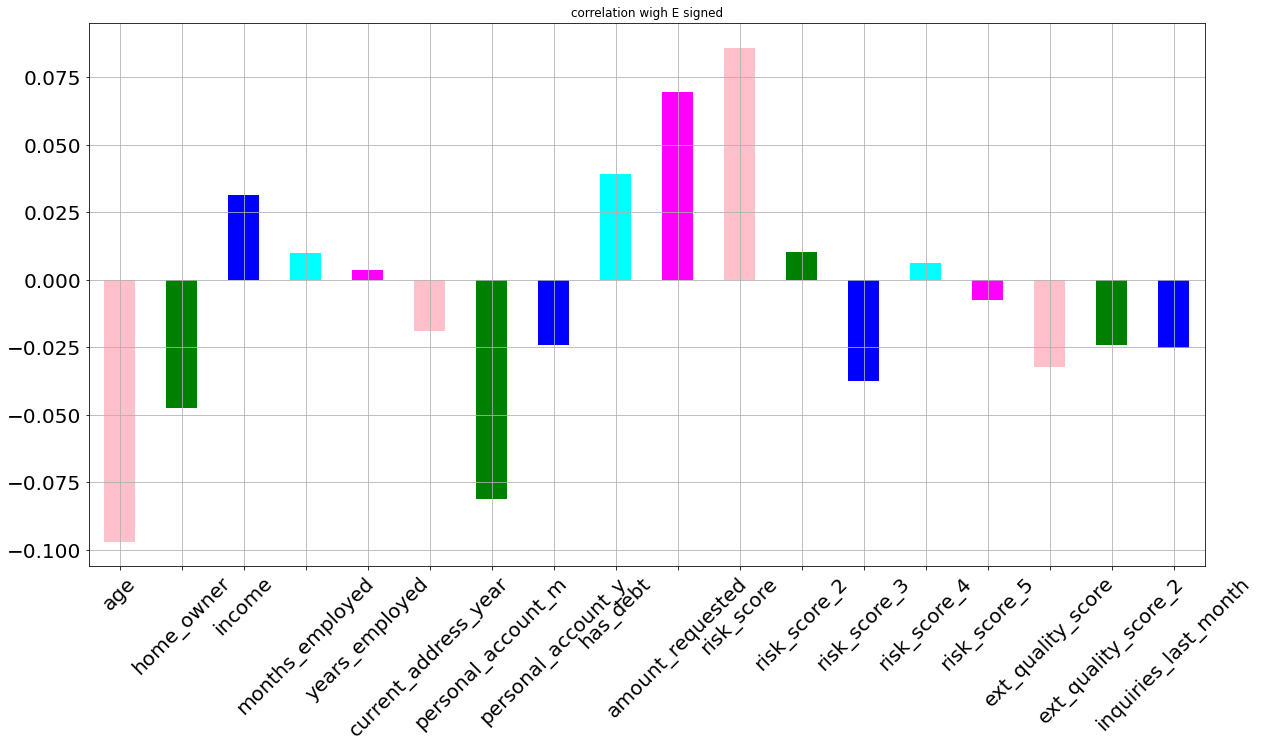

In [ ]:
#Correlation of independent variable with dependent variable

dataset.corrwith(data_df.e_signed).plot.bar(figsize=(20,10),title="correlation wigh E signed",
                                             fontsize=20,rot=45,grid= True,color=['pink','green',
                                                                                  'blue','cyan','magenta'])

In [ ]:
#Initiatizig into new variable and creating the dummy variable for categorical data
data2_df=data_df
dummy=pd.get_dummies(data2_df["pay_schedule"])


In [ ]:
dummy

,bi-weekly,monthly,semi-monthly,weekly
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
17903,0,1,0,0
17904,1,0,0,0
17905,0,0,0,1
17906,1,0,0,0


In [ ]:
dummy=dummy.drop(labels=["bi-weekly"],axis=1)

In [ ]:

data2_df=data2_df.drop(["pay_schedule"],axis=1)

In [ ]:

data2_df=pd.concat([data2_df,dummy],axis=1)

In [ ]:

data2_df.shape

(17908, 23)

In [ ]:
# Seperating the data into dependent and independent varioable. Response contains the esigned column which needs to be computed
#from the dataset
y = data2_df["e_signed"]
X= data2_df.drop(columns = ["e_signed", "entry_id"])

In [ ]:
#Transforming the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()

In [ ]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
#Fitting and transforming our data
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
X_train.shape

(14326, 21)

#### ***Building ANN Using Keras***


In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout




In [ ]:
#Adding the layers in ANN
from tensorflow import keras
model = Sequential()
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))


model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

opt = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 128, epochs = 100)

Epoch 1/100
112/112 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5398
Epoch 2/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5360
Epoch 3/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5392
Epoch 4/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5371
Epoch 5/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5782
Epoch 6/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.5954
Epoch 7/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.5960
Epoch 8/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.5951
Epoch 9/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.5919
Epoch 10/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6608 - accura

In [ ]:
#Predict functioon the test data using the model
pred=model.predict(X_test)

In [ ]:

y_pred = (pred > 0.5)

In [ ]:
accuracy_score(y_pred,y_test)

0.6253489670575098

## Other Machine Learning Model

#### Feature Engineering

##### AGE

We will group our age data as follows:


In [ ]:
#Initializing the Empty List
AGE=[]

for i in range(len(data_df)):
    if(data_df["age"][i]<=45):
        AGE.append("ADULT")
        
    else:
        AGE.append("SENIOR")

#### Months Employed and Personal Account

We will calculate months employed as follows:
<br>
<p style="text-indent:5em">month employed=month employed+ years employed*12</p>
    <p style="text-indent:5em">account_m=account_m+account_y*12</p>


In [ ]:
EMPLOYED=[]
for i in range(len(data_df)):
    x = data_df["months_employed"][i]+data_df["years_employed"][i]*12
    EMPLOYED.append(x)

In [ ]:
PA=[]
for i in range(len(data_df)):
    x=data_df["personal_account_m"][i]+data_df["personal_account_y"][i]*12
    PA.append(x)

In [ ]:
avg_risk=[]
for i in range(len(data_df)):
    x=(data_df["risk_score_2"][i]+data_df["risk_score_3"][i]+data_df["risk_score_4"][i]+data_df["risk_score_5"][i])/4
    avg_risk.append(x)

In [ ]:
ext_quality=[]
for i in range(len(data_df)):
    x=(data_df["ext_quality_score_2"][i]+data_df["ext_quality_score"][i])/2
    ext_quality.append(x)

#### Merging all the features into Single Dataframe

<p style="text-indent:5em">


In [ ]:
#Converting all lists into DataFrame
AGE=pd.DataFrame(AGE)
EMPLOYED=pd.DataFrame(EMPLOYED)
PA=pd.DataFrame(PA)
avg_risk=pd.DataFrame(avg_risk)
ext_quality=pd.DataFrame(ext_quality)

#Concatng all the features
featured=pd.concat([AGE,EMPLOYED,PA,avg_risk,ext_quality],axis=1)

In [ ]:
featured.columns=["AGE","EMPLOYED","PA","RISK","QUALITY"]

In [ ]:
featured.head()

,AGE,EMPLOYED,PA,RISK,QUALITY
0,ADULT,36,30,0.661151,0.480918
1,SENIOR,72,86,0.789841,0.680720
2,ADULT,6,19,0.691712,0.531712
3,ADULT,72,86,0.793179,0.692552
4,ADULT,60,98,0.688483,0.744634


In [ ]:
#Creating Dummy Variable
dummy1=pd.get_dummies(featured["AGE"])
dummy1.head()

,ADULT,SENIOR
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [ ]:
#Dropping the AGE Variable since dummy variable is created
featured=featured.drop(["AGE"],axis=1)

#Concating the data and dummy variable
featured=pd.concat([featured,dummy1],axis=1)
featured.head()

,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,36,30,0.661151,0.480918,1,0
1,72,86,0.789841,0.680720,0,1
2,6,19,0.691712,0.531712,1,0
3,72,86,0.793179,0.692552,1,0
4,60,98,0.688483,0.744634,1,0


#### Classifying the Data into dependent and independent Variable

In [ ]:
#Dependent Variable
dep="e_signed"

#Selelcting all the column as independent variable
ind=data_df.columns.tolist()

In [ ]:
ind

['entry_id',
 'age',
 'pay_schedule',
 'home_owner',
 'income',
 'months_employed',
 'years_employed',
 'current_address_year',
 'personal_account_m',
 'personal_account_y',
 'has_debt',
 'amount_requested',
 'risk_score',
 'risk_score_2',
 'risk_score_3',
 'risk_score_4',
 'risk_score_5',
 'ext_quality_score',
 'ext_quality_score_2',
 'inquiries_last_month',
 'e_signed']

In [ ]:
#Removing the dependent variable from independent
ind.remove(dep)
ind.remove("entry_id")

In [ ]:
#Selecting the Data
X = data_df[ind]
Y = data_df[dep]

In [ ]:
#Concating the featured data and unfeatured data
X = pd.concat([X,featured],axis=1)
X.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,36,30,0.661151,0.480918,1,0
1,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,72,86,0.789841,0.680720,0,1
2,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,6,19,0.691712,0.531712,1,0
3,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,72,86,0.793179,0.692552,1,0
4,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,60,98,0.688483,0.744634,1,0


In [ ]:
#Dropping the unnecessay data from our dataset
X=X.drop(labels=["age","months_employed","years_employed","personal_account_m","personal_account_y","risk_score_2","risk_score_3"
                ,"risk_score_4","risk_score_5","ext_quality_score_2","ext_quality_score"],axis=1)

In [ ]:
X.head()

,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,bi-weekly,1,3135,3,1,550,36200,10,36,30,0.661151,0.480918,1,0
1,weekly,0,3180,3,1,600,30150,9,72,86,0.789841,0.680720,0,1
2,weekly,0,1540,0,1,450,34550,7,6,19,0.691712,0.531712,1,0
3,bi-weekly,0,5230,1,1,700,42150,8,72,86,0.793179,0.692552,1,0
4,semi-monthly,0,3590,2,1,1100,53850,12,60,98,0.688483,0.744634,1,0


In [ ]:
#Creating Dummy Variable
dummy2=pd.get_dummies(X["pay_schedule"])

#Removing the trap
dummy2=dummy2.drop(labels=["bi-weekly"],axis=1)
dummy2.head()

,monthly,semi-monthly,weekly
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0


In [ ]:
#Dropping the pay_schedule since dummy variable is created
X=X.drop(labels=["pay_schedule"],axis=1)

#Concating the data and dummy variable
x=pd.concat([X,dummy2],axis=1)
x.head()

,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR,monthly,semi-monthly,weekly
0,1,3135,3,1,550,36200,10,36,30,0.661151,0.480918,1,0,0,0,0
1,0,3180,3,1,600,30150,9,72,86,0.789841,0.680720,0,1,0,0,1
2,0,1540,0,1,450,34550,7,6,19,0.691712,0.531712,1,0,0,0,1
3,0,5230,1,1,700,42150,8,72,86,0.793179,0.692552,1,0,0,0,0
4,0,3590,2,1,1100,53850,12,60,98,0.688483,0.744634,1,0,0,1,0


#### Data Transformation and Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()
#Transforming the data
X=scale.fit_transform(x)

##### Splitting the Data

In [ ]:
#from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=42)

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logModel = LogisticRegression()
logModel.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logModel.predict(xtest)

In [ ]:
logacc = accuracy_score(ytest, y_pred)
logacc

0.5677909314272951

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
#Initializing the object
model2=RandomForestClassifier()

In [ ]:
#Fitting the model
model2.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Predictions on test data
pred=model2.predict(xtest)

In [ ]:
accuracy_score(ytest,pred)

0.6245253517980791

### Gradient Boosting

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=learning_rate, max_features=5, max_depth=2, random_state=0)
    gb_clf.fit(xtrain, ytrain)

In [ ]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xtrain, ytrain)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(xtest, ytest)))

Learning rate:  1
Accuracy score (training): 0.771
Accuracy score (validation): 0.623


### XgBoost




In [ ]:
#Implementing xgboost
from xgboost import XGBClassifier

In [ ]:
#Initializing the model
xgb_clf = XGBClassifier(n_estimators=500,gamma=1)
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
score = xgb_clf.score(xtest, ytest)
print(score)

0.6417243689970963


#### Support Vector Machine



In [ ]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting Test Set
y_pred = classifier.predict(xtest)

In [ ]:
#Finding the Accuracy Score
acc = accuracy_score(ytest, y_pred)
acc

0.6026356935447844

In [ ]:
from xgboost import plot_importance
xgb_clf.feature_importances_

array([0.09314162, 0.06050942, 0.03984164, 0.07395456, 0.14694811,
       0.07051175, 0.0366752 , 0.03939145, 0.1028946 , 0.04125661,
       0.03707824, 0.13937621, 0.        , 0.03600062, 0.04486239,
       0.03755758], dtype=float32)

<BarContainer object of 16 artists>

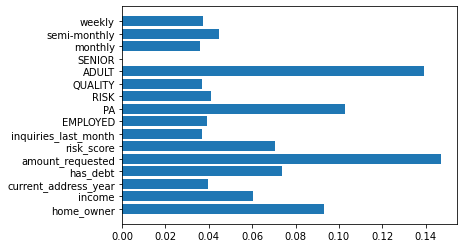

In [ ]:
plt.barh(x.columns, xgb_clf.feature_importances_)


<br>
<h4><font color="blue">Models implemented:</font></h4>

<ul>
    <li>Artificial Neural Network</li>
    <li>Random Forest Classifier</li>
    <li>Gradient Boosting</li>
    <li>Support Vector Machine</li>
    <li>Xg Boost</li>
    <li>Logistic Regression</li>
</ul>

<h2><font color="blue"><b>Observation</b></font><h2>
    
 <ul>
    <li>XgBoost Algorithm performs the best and give the accuracy of 64 %</li>
    <li>We see that the ANN with no feature engineering performs far better than SVM, Random Forest with feature engineering</li>
    <li>Though we didnt get very high accuracy but this can help the banks in knowing whether the customer is risky or not.</li>
</ul>

Reference

https://www.financialexpress.com/money/what-is-e-sign-and-how-it-can-help-manage-your-personal-finance-better-all-you-need-to-know/950129/